<a href="https://colab.research.google.com/github/doom160/stockTechnicalAnalysis/blob/master/stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
!pip install yfinance 
!pip install lxml
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import yfinance as yf
plt.style.use('fivethirtyeight')
plt2.style.use('fivethirtyeight')


In [73]:
ticker = "MCD"
stock = yf.Ticker(ticker)

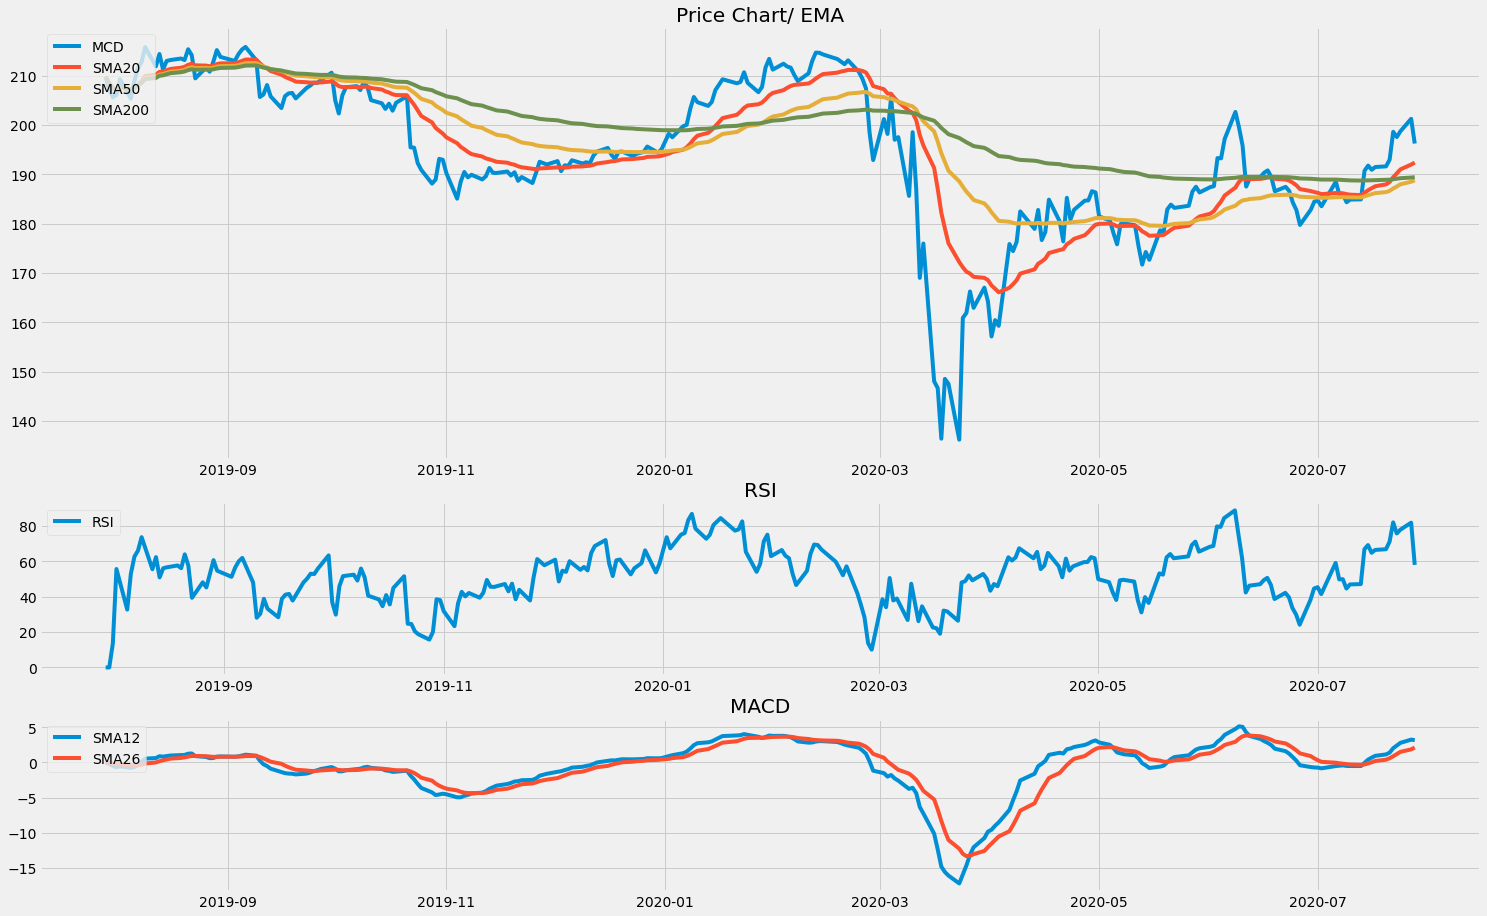

In [77]:
fig = plt.figure(figsize=(20,12))
ax1 = plt.axes([0,0.5,1,0.5])
ax2 = plt.axes([0,0.25,1,0.2])
ax3 = plt.axes([0,0,1,0.2])
ax1.set_path_effects([path_effects.Stroke(linewidth=0.1)])

hist = stock.history(period="1y")
ax1.plot(hist['Close'], label=ticker)

SMA20 = pd.DataFrame()
SMA50 = pd.DataFrame()
SMA200 = pd.DataFrame()
SMA20['price'] = hist['Close'].ewm(span=20).mean()
SMA50['price'] = hist['Close'].ewm(span=50).mean()
SMA200['price'] = hist['Close'].ewm(span=200).mean()
ax1.plot(SMA20['price'], label='SMA20')
ax1.plot(SMA50['price'], label='SMA50')
ax1.plot(SMA200['price'], label='SMA200')


# MACD
SMA12 = pd.DataFrame()
SMA12['price'] = hist['Close'].ewm(span=12,adjust=False).mean()
SMA26 = pd.DataFrame()
SMA26['price'] = hist['Close'].ewm(span=26,adjust=False).mean()
MACD = pd.DataFrame()
MACD = SMA12 - SMA26
MACD_SIGNAL = pd.DataFrame()
MACD_SIGNAL = MACD.ewm(span=9,adjust=False).mean()
ax3.plot(MACD, label='SMA12')
ax3.plot(MACD_SIGNAL, label='SMA26')


# RSI
delta = hist['Close'].diff()

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
# Calculate the EWMA
roll_up1 = up.ewm(span=14).mean()
roll_down1 = down.abs().ewm(span=14).mean()
# Calculate the RSI based on EWMA
RS1 = roll_up1 / roll_down1
RSI1 = 100.0 - (100.0 / (1.0 + RS1))
ax2.plot(RSI1, label='RSI')


#macd_min = pd.DataFrame()
#macd_max = pd.DataFrame()
#macd_d = pd.DataFrame()
#macd_min['Low'] = hist['Low'].rolling(window = 10).min()
#macd_max['High'] = hist['High'].rolling(window = 10).max()
#macd_k = (hist['Close'] - macd_min['Low'])/ (macd_max['High']- macd_min['Low']) * 100
#macd_d = macd_k.rolling(window = 3).mean()


#ax2.plot(macd_k,label='K Fast')
#ax2.plot(macd_d,label='D Slow')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')
ax1.set_title(label='Price Chart/ EMA')
ax2.set_title(label='RSI')
ax3.set_title(label='MACD')
plt.show()